In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
import numpy as np
import seaborn as sns
import warnings
from IPython import display
from sklearn.preprocessing import StandardScaler 
from sklearn.pipeline import Pipeline 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report
from dython.nominal import associations
from sklearn.metrics import confusion_matrix 
from sklearn.svm import SVC
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('corona_tested_individuals_ver_006.english.csv')

In [3]:
df.describe()

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
count,278848,278848,278848,278848,278848,278848,278848,278848,278848,278848
unique,51,5,5,5,5,5,3,3,3,3
top,2020-04-20,0,0,0,0,0,negative,None,female,Other
freq,10921,121649,133942,260664,261079,260079,260227,127320,130158,242741


In [4]:
df.isna().sum()

test_date              0
cough                  0
fever                  0
sore_throat            0
shortness_of_breath    0
head_ache              0
corona_result          0
age_60_and_above       0
gender                 0
test_indication        0
dtype: int64

In [5]:
df.head()

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2020-04-30,0,0,0,0,0,negative,None,female,Other
1,2020-04-30,1,0,0,0,0,negative,None,female,Other
2,2020-04-30,0,1,0,0,0,negative,None,male,Other
3,2020-04-30,1,0,0,0,0,negative,None,female,Other
4,2020-04-30,1,0,0,0,0,negative,None,male,Other


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   test_date            278848 non-null  object
 1   cough                278848 non-null  object
 2   fever                278848 non-null  object
 3   sore_throat          278848 non-null  object
 4   shortness_of_breath  278848 non-null  object
 5   head_ache            278848 non-null  object
 6   corona_result        278848 non-null  object
 7   age_60_and_above     278848 non-null  object
 8   gender               278848 non-null  object
 9   test_indication      278848 non-null  object
dtypes: object(10)
memory usage: 21.3+ MB


# we can see already that's the type in each column is an object and that may cause some problems

Text(0.5, 1.0, 'The Count in the column Fever')

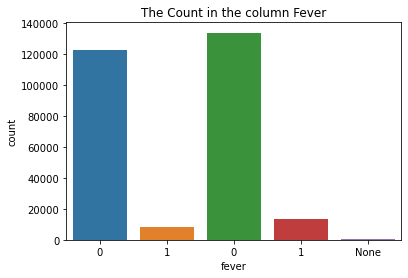

In [7]:
sns.countplot(df['fever'])
plt.title("The Count in the column Fever")

# there's two types of ones and two types of zeros!

# we can see it's unbalanced we have a huge margin between the one and the  zero

Text(0.5, 1.0, 'The Count in the column sore throat')

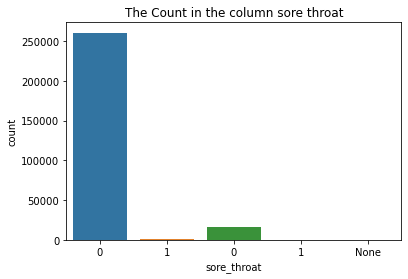

In [8]:
sns.countplot(df['sore_throat'])
plt.title("The Count in the column sore throat")

# we can see clearly that it is imbalanced  and there is two types of ones and zeros 

In [9]:
list(df.sore_throat).count('None')

1

# we can see that we have one None in the column sore_throat

In [10]:
list(df.sore_throat).count('1')

446

Text(0.5, 1.0, ' Count in the column shortness of breath')

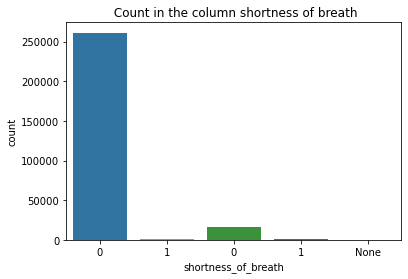

In [11]:
sns.countplot(df['shortness_of_breath'])
plt.title(" Count in the column shortness of breath")

# we can see clearly that it is imbalanced  and there is two types of ones and zeros 

Text(0.5, 1.0, 'Count in column Head Ache')

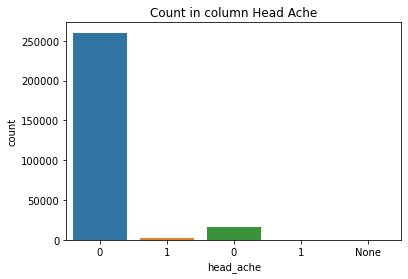

In [12]:
sns.countplot(df['head_ache'])
plt.title("Count in column Head Ache")

# we can see clearly that it is imbalanced  and there is two types of ones and zeros 

Text(0.5, 1.0, 'Count in corona result')

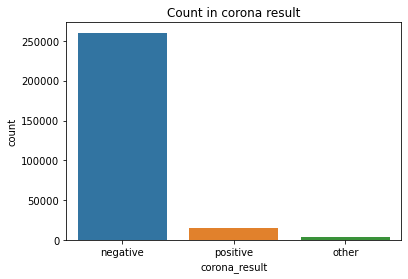

In [13]:
sns.countplot(df['corona_result'])
plt.title("Count in corona result")

# we can see we have "other" this can beclassified as missing values? and we can see it's an imbalanced 

Text(0.5, 1.0, ' Count in age 60 and above ')

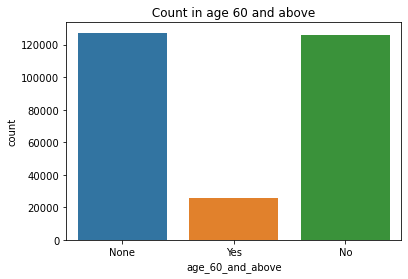

In [14]:
sns.countplot(df['age_60_and_above'])
plt.title(" Count in age 60 and above ")

Text(0.5, 1.0, 'Count in column gender')

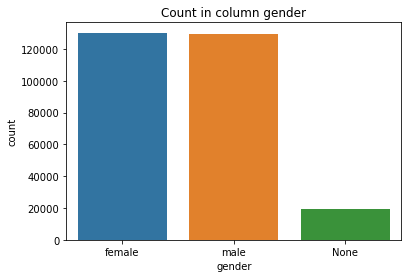

In [15]:
sns.countplot(df['gender'])
plt.title("Count in column gender")

# Perfect Distribution

Text(0.5, 1.0, 'Count in test indication')

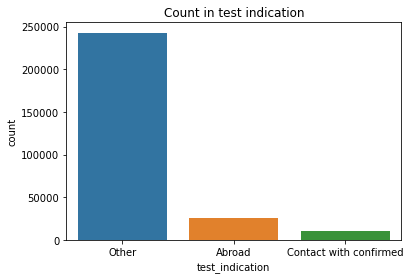

In [16]:
sns.countplot(df['test_indication'])
plt.title("Count in test indication")

# We have some continuous columns and some categorically columns so the DF. Corr doesn't work on categorical columns so I found this Library called dython I read about it in this article : https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9

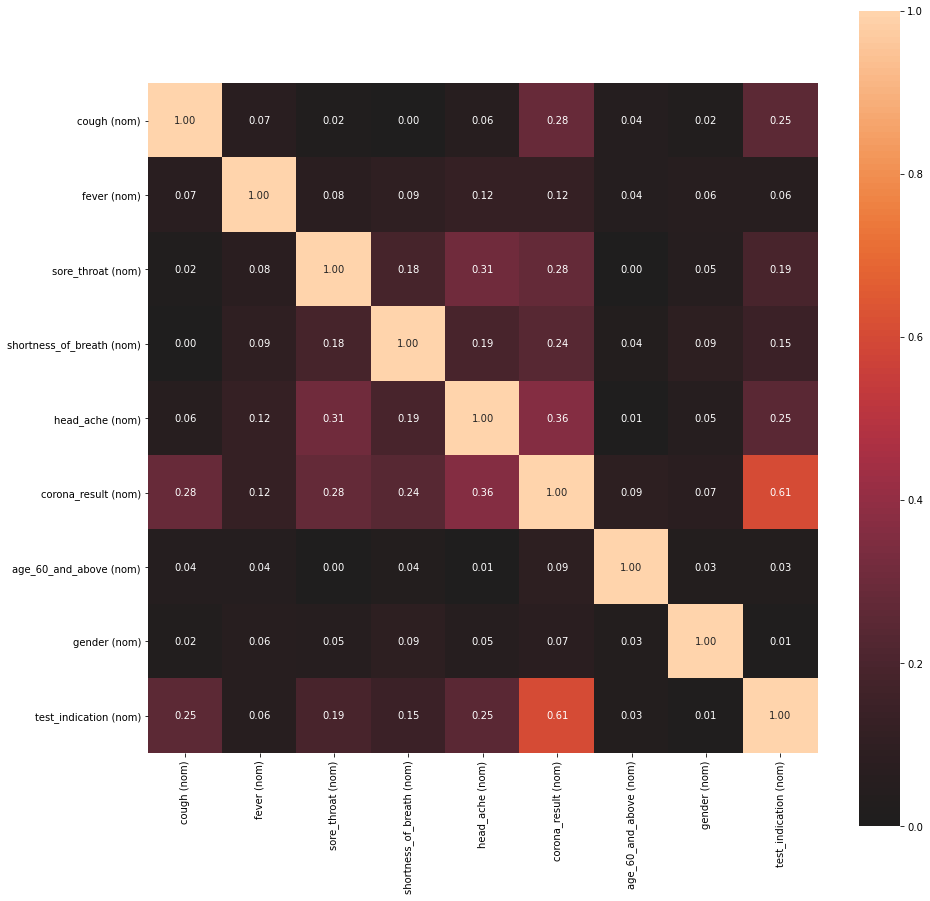

{'corr':                            cough (nom)  fever (nom)  sore_throat (nom)  \
 cough (nom)                   1.000000     0.069725           0.021716   
 fever (nom)                   0.069725     1.000000           0.075031   
 sore_throat (nom)             0.021716     0.075031           1.000000   
 shortness_of_breath (nom)     0.000000     0.094878           0.180837   
 head_ache (nom)               0.060616     0.120808           0.308160   
 corona_result (nom)           0.284892     0.120649           0.279966   
 age_60_and_above (nom)        0.043176     0.044731           0.000000   
 gender (nom)                  0.023723     0.060107           0.052696   
 test_indication (nom)         0.250590     0.060993           0.192995   
 
                            shortness_of_breath (nom)  head_ache (nom)  \
 cough (nom)                                 0.000000         0.060616   
 fever (nom)                                 0.094878         0.120808   
 sore_throat (nom)

In [61]:
associations(df,mark_columns=True ,nominal_columns="all", figsize=(15,15))

# We can see that there is no strong correlation between of the columns, in the Target variable there is correlation with the test Indication

# you can see clearly that the data set is imbalanced 

# To fix the imbalanced dataset we can approach it in different ways

# we can oversampl minority class or undersampl the majority class or the thrid option ensemble method which is if we have 3000 in the majority class and 1000 in the minority class 

# you bulid three models with 1000 in each class then take a majority vote




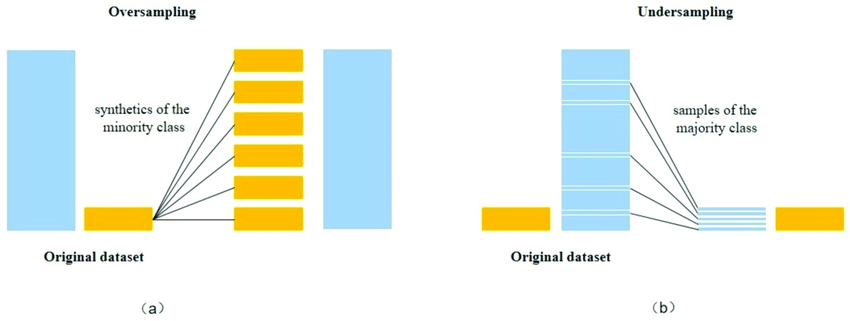

In [18]:
display.Image("Random-a-over-sampling-b-under-sampling.png")

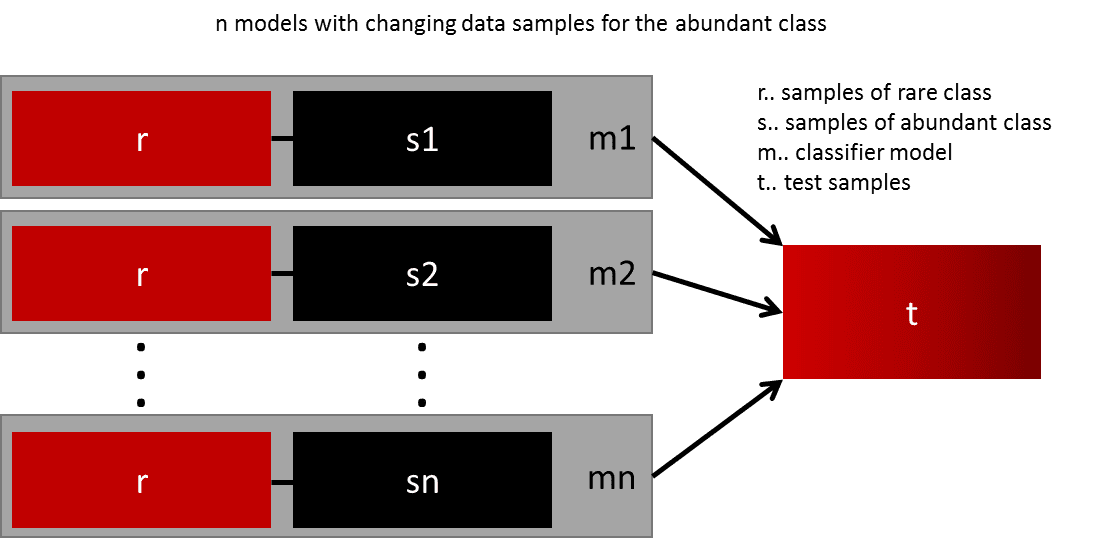

In [19]:
display.Image("imbalanced-data-2.png")

In [20]:
df.tail()

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
278843,2020-03-11,0,0,0,0,0,negative,None,None,Other
278844,2020-03-11,0,0,0,0,0,negative,None,None,Other
278845,2020-03-11,0,0,0,0,0,positive,None,None,Contact with confirmed
278846,2020-03-11,0,0,0,0,0,other,None,None,Other
278847,2020-03-11,0,0,0,0,0,negative,None,None,Other


# First we drop the date column 

In [21]:
df.drop("test_date", axis=1, inplace=True)

In [22]:
df

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,0,0,0,0,0,negative,None,female,Other
1,1,0,0,0,0,negative,None,female,Other
2,0,1,0,0,0,negative,None,male,Other
3,1,0,0,0,0,negative,None,female,Other
4,1,0,0,0,0,negative,None,male,Other
...,...,...,...,...,...,...,...,...,...
278843,0,0,0,0,0,negative,None,None,Other
278844,0,0,0,0,0,negative,None,None,Other
278845,0,0,0,0,0,positive,None,None,Contact with confirmed
278846,0,0,0,0,0,other,None,None,Other


In [23]:
(df[df['cough']=='None'].count())/278848


cough                  0.000904
fever                  0.000904
sore_throat            0.000904
shortness_of_breath    0.000904
head_ache              0.000904
corona_result          0.000904
age_60_and_above       0.000904
gender                 0.000904
test_indication        0.000904
dtype: float64

# The Missing values are  minuscule

# Now We Fix the Types in The DF 

In [24]:
df = df[df.head_ache != 'None']
df = df[df.corona_result != 'other']
df = df[df.age_60_and_above != 'None']
df = df[df.test_indication != 'Other']
df = df[df.cough != 'None']


df['cough'] = df['cough'].astype(float) 
df['sore_throat'] = df['sore_throat'].astype(float) 
df['shortness_of_breath'] = df['shortness_of_breath'].astype(float) 
df['head_ache'] = df['head_ache'].astype(float) 
df['shortness_of_breath'] = df['shortness_of_breath'].astype(float) 

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23394 entries, 122811 to 274334
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   cough                23394 non-null  float64
 1   fever                23394 non-null  object 
 2   sore_throat          23394 non-null  float64
 3   shortness_of_breath  23394 non-null  float64
 4   head_ache            23394 non-null  float64
 5   corona_result        23394 non-null  object 
 6   age_60_and_above     23394 non-null  object 
 7   gender               23394 non-null  object 
 8   test_indication      23394 non-null  object 
dtypes: float64(4), object(5)
memory usage: 1.8+ MB


In [26]:
# creating a DataFrame
d = {'cough': [0,1],
        'fever': [0,1],
        'sore_throat': [0,1],
        'shortness_of_breath': [0,1],
        'head_ache': [0,1],
        'corona_result': ['negative','positive', 'other'],
        'age_60_and_above': ['None','Yes','No'],
        'gender': ['female','male','None'],
        'test_indication': ['Contact with confirmed','Other','Abroad'],}


#df = pd.DataFrame (data=d)


#error ValueError: arrays must all be same length

# Checking the length of each column

In [27]:
print(len(df['cough']), len(df['fever']), len(df['sore_throat']),  len(df['shortness_of_breath']) , len(df['head_ache']) 
, len(df['corona_result']) , len(df['age_60_and_above']) , len(df['gender']) , len(df['test_indication']))

23394 23394 23394 23394 23394 23394 23394 23394 23394


In [28]:
df

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
122811,0.0,1,0.0,0.0,0.0,negative,No,female,Abroad
122814,0.0,0,0.0,0.0,0.0,negative,No,female,Abroad
122815,1.0,0,0.0,0.0,0.0,positive,No,female,Contact with confirmed
122823,1.0,1,1.0,0.0,0.0,negative,No,male,Contact with confirmed
122824,0.0,0,0.0,0.0,0.0,negative,No,male,Contact with confirmed
...,...,...,...,...,...,...,...,...,...
274297,0.0,1,0.0,0.0,1.0,positive,No,None,Contact with confirmed
274309,0.0,0,0.0,0.0,0.0,positive,Yes,None,Contact with confirmed
274315,1.0,1,0.0,0.0,0.0,positive,No,None,Contact with confirmed
274324,0.0,1,0.0,0.0,0.0,positive,No,None,Abroad


# Let's try the first mehod UnderSampling of the majority class 

In [29]:
df.head()

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
122811,0.0,1,0.0,0.0,0.0,negative,No,female,Abroad
122814,0.0,0,0.0,0.0,0.0,negative,No,female,Abroad
122815,1.0,0,0.0,0.0,0.0,positive,No,female,Contact with confirmed
122823,1.0,1,1.0,0.0,0.0,negative,No,male,Contact with confirmed
122824,0.0,0,0.0,0.0,0.0,negative,No,male,Contact with confirmed


In [30]:
# split all possible outcomes of the target feature

class_negative =  df[df['corona_result']== 'negative']
class_positive =  df[df['corona_result']== 'positive']

In [31]:
# specify the length of each possible outcome of the target feature

class_negative_len = len(class_negative)
class_positive_len = len(class_positive)

# Checking The Shape

In [32]:
class_negative.shape

(16248, 9)

In [33]:
class_positive.shape

(7146, 9)

# We Will use the sample function in pandas by specifying a number and it will selects random rows out of the DF

In [34]:
class_negative = class_negative.sample(7146)

In [35]:
df_underS = pd.concat([class_negative ,class_positive],axis=0 )

In [36]:
df_underS

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
167525,1.0,0,0.0,0.0,0.0,negative,Yes,male,Contact with confirmed
156547,0.0,0,0.0,0.0,0.0,negative,No,female,Contact with confirmed
136898,1.0,0,0.0,0.0,0.0,negative,No,male,Contact with confirmed
256249,1.0,0,0.0,0.0,0.0,negative,Yes,male,Abroad
145529,1.0,0,0.0,0.0,0.0,negative,No,female,Abroad
...,...,...,...,...,...,...,...,...,...
274284,1.0,1,0.0,0.0,0.0,positive,No,None,Contact with confirmed
274297,0.0,1,0.0,0.0,1.0,positive,No,None,Contact with confirmed
274309,0.0,0,0.0,0.0,0.0,positive,Yes,None,Contact with confirmed
274315,1.0,1,0.0,0.0,0.0,positive,No,None,Contact with confirmed


In [37]:
class_negative.shape

(7146, 9)

Text(0.5, 1.0, 'Count in the corona result')

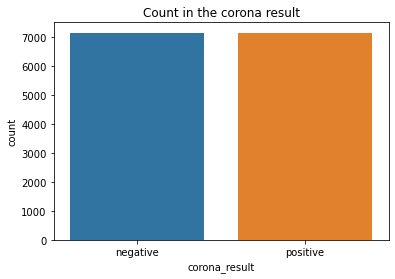

In [38]:
sns.countplot(df_underS['corona_result'])
plt.title("Count in the corona result")

# Now Our new DF have 14292  row and it is now balanced 

In [39]:
# lable Enconding for categorical columns
from sklearn.preprocessing import LabelEncoder
cols =['corona_result', 'age_60_and_above','gender','test_indication']
le = LabelEncoder()

for col in cols:
    df_underS[col] = le.fit_transform(df_underS[col])
    
df_underS.head()

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
167525,1.0,0,0.0,0.0,0.0,0,1,2,1
156547,0.0,0,0.0,0.0,0.0,0,0,1,1
136898,1.0,0,0.0,0.0,0.0,0,0,2,1
256249,1.0,0,0.0,0.0,0.0,0,1,2,0
145529,1.0,0,0.0,0.0,0.0,0,0,1,0


In [40]:
x = df_underS.drop(columns=['corona_result'], axis=1) 
y = df_underS['corona_result']

In [41]:
# Specify the hyperparameter 
parameters = {'SVM__C': [1, 10, 100],#3
              'SVM__gamma': [0.1, 0.01],#2
              'SVM__kernel': ['rbf']}#1

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=21 , stratify =y)

In [42]:
# Setup the pipeline
steps = [('imputation', SimpleImputer(missing_values='None',strategy='most_frequent', add_indicator=True)),
        ('scaler', StandardScaler()),
         ('SVM', SVC())]

In [43]:
# instantiate the pipeline
pipeline = Pipeline(steps)

In [44]:
# instantiate the GridSeachCV
cv = GridSearchCV(pipeline, param_grid=parameters)

In [45]:
# Fit to the training set
cv.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('imputation',
                                        SimpleImputer(add_indicator=True,
                                                      missing_values='None',
                                                      strategy='most_frequent')),
                                       ('scaler', StandardScaler()),
                                       ('SVM', SVC())]),
             param_grid={'SVM__C': [1, 10, 100], 'SVM__gamma': [0.1, 0.01],
                         'SVM__kernel': ['rbf']})

# Note: it takes too long to fit the model

In [46]:
y_pred = cv.predict(X_test)

In [47]:
confusion_matrix(y_test, y_pred)

array([[1199,  230],
       [ 200, 1230]], dtype=int64)

In [48]:
print("Accuracy: {}".format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))

Accuracy: 0.8495977614550542
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1429
           1       0.84      0.86      0.85      1430

    accuracy                           0.85      2859
   macro avg       0.85      0.85      0.85      2859
weighted avg       0.85      0.85      0.85      2859

Tuned Model Parameters: {'SVM__C': 10, 'SVM__gamma': 0.1, 'SVM__kernel': 'rbf'}


In [49]:
from sklearn.ensemble import RandomForestClassifier


parameters = {'RandomForest__criterion':['gini', 'entropy'],
              'RandomForest__max_features':['auto', 'sqrt', 'log2'],
              'RandomForest__class_weight':['balanced', 'balanced_subsample']
             
             
             }

# 
# Setup the pipeline
steps = [('scaler', StandardScaler()),
         ('RandomForest', RandomForestClassifier())]


# instantiate the pipeline
pipeline = Pipeline(steps)

# instantiate the GridSeachCV
cv = GridSearchCV(pipeline, param_grid=parameters)
# Fit to the training set
cv.fit(X_train, y_train)

y_pred = cv.predict(X_test)

confusion_matrix(y_test, y_pred)

print("Accuracy: {}".format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))




Accuracy: 0.8485484435117174
              precision    recall  f1-score   support

           0       0.85      0.84      0.85      1429
           1       0.84      0.86      0.85      1430

    accuracy                           0.85      2859
   macro avg       0.85      0.85      0.85      2859
weighted avg       0.85      0.85      0.85      2859

Tuned Model Parameters: {'RandomForest__class_weight': 'balanced', 'RandomForest__criterion': 'entropy', 'RandomForest__max_features': 'auto'}


# Mehod #2 Oversampling of the minority class 

In [50]:
# split all possible outcomes of the target feature
class_negative =  df[df['corona_result']== 'negative']
class_positive =  df[df['corona_result']== 'positive']

In [51]:
class_negative.shape

(16248, 9)

In [52]:
class_positive.shape

(7146, 9)

In [53]:
# we duplicated the minority class
overS_class_p = class_positive.sample(260227 , replace=True)

In [54]:
overS_class_p

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
192359,1.0,0,1.0,0.0,1.0,positive,No,male,Contact with confirmed
187803,0.0,0,0.0,0.0,0.0,positive,No,male,Contact with confirmed
253905,0.0,0,0.0,1.0,0.0,positive,No,male,Contact with confirmed
195409,0.0,1,0.0,0.0,0.0,positive,Yes,female,Contact with confirmed
256456,1.0,1,0.0,0.0,1.0,positive,No,female,Abroad
...,...,...,...,...,...,...,...,...,...
147328,1.0,0,0.0,0.0,0.0,positive,No,female,Abroad
208739,1.0,1,0.0,0.0,0.0,positive,Yes,male,Abroad
246177,1.0,1,0.0,0.0,0.0,positive,No,female,Contact with confirmed
232963,0.0,0,0.0,0.0,1.0,positive,No,male,Contact with confirmed


In [55]:
df_OverS = pd.concat([class_negative ,overS_class_p],axis=0 )

In [56]:
df_OverS

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
122811,0.0,1,0.0,0.0,0.0,negative,No,female,Abroad
122814,0.0,0,0.0,0.0,0.0,negative,No,female,Abroad
122823,1.0,1,1.0,0.0,0.0,negative,No,male,Contact with confirmed
122824,0.0,0,0.0,0.0,0.0,negative,No,male,Contact with confirmed
122831,0.0,0,0.0,0.0,0.0,negative,No,male,Contact with confirmed
...,...,...,...,...,...,...,...,...,...
147328,1.0,0,0.0,0.0,0.0,positive,No,female,Abroad
208739,1.0,1,0.0,0.0,0.0,positive,Yes,male,Abroad
246177,1.0,1,0.0,0.0,0.0,positive,No,female,Contact with confirmed
232963,0.0,0,0.0,0.0,1.0,positive,No,male,Contact with confirmed


In [57]:
# lable Enconding for categorical columns
from sklearn.preprocessing import LabelEncoder
cols =['corona_result', 'age_60_and_above','gender','test_indication']
le = LabelEncoder()

for col in cols:
    df_OverS[col] = le.fit_transform(df_OverS[col])
    
df_OverS.head()

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
122811,0.0,1,0.0,0.0,0.0,0,0,1,0
122814,0.0,0,0.0,0.0,0.0,0,0,1,0
122823,1.0,1,1.0,0.0,0.0,0,0,2,1
122824,0.0,0,0.0,0.0,0.0,0,0,2,1
122831,0.0,0,0.0,0.0,0.0,0,0,2,1


In [58]:
x = df_OverS.drop(columns=['corona_result'], axis=1) 
y = df_OverS['corona_result']

In [ ]:
# Specify the hyperparameter 
parameters = {'SVM__C': [1, 10, 100],#3
              'SVM__gamma': [0.1, 0.01],#2
              'SVM__kernel': ['rbf']}#1

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=21 , stratify =y)

In [ ]:
# Setup the pipeline
steps = [('imputation', SimpleImputer(missing_values='None',strategy='most_frequent', add_indicator=True)),
        ('scaler', StandardScaler()),
         ('SVM', SVC())]

In [ ]:
# instantiate the pipeline
pipeline_1 = Pipeline(steps)

In [ ]:
# instantiate the GridSeachCV
cv_1 = GridSearchCV(pipeline_1, param_grid=parameters)

In [ ]:
# Fit to the training set
cv_1.fit(X_train, y_train)

# Note: it takes too long to fit the model

In [ ]:
y_pred = cv.predict(X_test)

In [ ]:
confusion_matrix(y_test, y_pred)

In [ ]:
print("Accuracy: {}".format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))

# Method 3 use of Ensemble with undersampling

In [60]:
df

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
122811,0.0,1,0.0,0.0,0.0,negative,No,female,Abroad
122814,0.0,0,0.0,0.0,0.0,negative,No,female,Abroad
122815,1.0,0,0.0,0.0,0.0,positive,No,female,Contact with confirmed
122823,1.0,1,1.0,0.0,0.0,negative,No,male,Contact with confirmed
122824,0.0,0,0.0,0.0,0.0,negative,No,male,Contact with confirmed
...,...,...,...,...,...,...,...,...,...
274297,0.0,1,0.0,0.0,1.0,positive,No,None,Contact with confirmed
274309,0.0,0,0.0,0.0,0.0,positive,Yes,None,Contact with confirmed
274315,1.0,1,0.0,0.0,0.0,positive,No,None,Contact with confirmed
274324,0.0,1,0.0,0.0,0.0,positive,No,None,Abroad


In [62]:
# split all possible outcomes of the target feature
class_negative =  df[df['corona_result']== 'negative']
class_positive =  df[df['corona_result']== 'positive']



In [63]:
len(class_negative)

16248

In [64]:
len(class_positive)

7146

In [68]:
# Seeing How many patches we need
16248/7146

2.2737195633921075

# We can do it in two patches of the negative class 

In [103]:
# Specify the hyperparameter for the two modeles
parameters = {'C': [1, 10, 100],#3
              'gamma': [0.1, 0.01],#2
              'kernel': ['rbf']}#1

In [121]:
# we duplicated the minority class
negative_class = class_negative.sample(7146)


df1 = pd.concat([negative_class ,class_positive],axis=0 )

# lable Enconding for categorical columns
from sklearn.preprocessing import LabelEncoder
cols =['corona_result', 'age_60_and_above','gender','test_indication']
le = LabelEncoder()

for col in cols:
    df1[col] = le.fit_transform(df1[col])
    
# Specifying X and Y 
x = df1.drop(columns=['corona_result'], axis=1) 
y = df1['corona_result']


# Create train and test sets
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(x,y,test_size=0.2, random_state=21 , stratify =y)

# instantiate the classifier(SVM)
svm_1 = SVC()

# instantiate the GridSeachCV
cv = GridSearchCV(svm_1, param_grid=parameters)

# Fiting the model to the train set
cv.fit(X_train_1, y_train_1)

# Predicting on the test set
y_pred_1 = cv.predict(X_test_1)

# Checking the classification report
print("Accuracy: {}".format(cv.score(X_test_1, y_test_1)))
print(classification_report(y_test_1, y_pred_1))
print("Tuned Model Parameters: {}".format(cv.best_params_))



Accuracy: 0.8464498076250437
              precision    recall  f1-score   support

           0       0.85      0.84      0.84      1429
           1       0.84      0.86      0.85      1430

    accuracy                           0.85      2859
   macro avg       0.85      0.85      0.85      2859
weighted avg       0.85      0.85      0.85      2859

Tuned Model Parameters: {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}


In [110]:
# we duplicated the minority class
negative_class = class_negative.sample(7146)

df1 = pd.concat([negative_class ,class_positive],axis=0 )

# lable Enconding for categorical columns
from sklearn.preprocessing import LabelEncoder
cols =['corona_result', 'age_60_and_above','gender','test_indication']
le = LabelEncoder()

for col in cols:
    df1[col] = le.fit_transform(df1[col])
    
# Specifying X and Y   
x = df1.drop(columns=['corona_result'], axis=1) 
y = df1['corona_result']

# instantiate the classifier(SVM)
svm_2 = SVC() 

# instantiate the GridSeachCV
cv = GridSearchCV(svm_2, param_grid=parameters)

# Fiting the model to the train set
cv.fit(X_train_1, y_train_1)

# Predicting on the test set
y_pred_2 = cv.predict(X_test_1)

# Checking the classification report
print("Accuracy: {}".format(cv.score(X_test_1, y_test_1)))
print(classification_report(y_test_1, y_pred_2))
print("Tuned Model Parameters: {}".format(cv.best_params_))

Accuracy: 0.8461000349772648
              precision    recall  f1-score   support

           0       0.85      0.84      0.84      1429
           1       0.84      0.86      0.85      1430

    accuracy                           0.85      2859
   macro avg       0.85      0.85      0.85      2859
weighted avg       0.85      0.85      0.85      2859

Tuned Model Parameters: {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}


In [117]:
# We created a function so we can see whatthe two model decide as an outcome
y_pred_final = y_pred_1.copy()

for i in range(len(y_pred_1)):
    n = y_pred_2[i] + y_pred_1[i]
    if n >1:
        y_pred_final[i] = 1
    else:
        y_pred_final[1] = 0 

In [118]:
print(classification_report(y_test, y_pred_final))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84      1429
           1       0.84      0.86      0.85      1430

    accuracy                           0.85      2859
   macro avg       0.85      0.85      0.85      2859
weighted avg       0.85      0.85      0.85      2859

